In [518]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt

In [519]:
data_dir = 'wine-data'
raw_file = 'winemag-data_first150k.csv'
raw_df = pd.read_csv(os.path.join(data_dir, raw_file))

print('Shape of raw dataframe {}' .format(raw_df.shape))

raw_df.drop(raw_df.columns[0], axis=1, inplace=True)
raw_df.drop(['region_2', 'designation'], axis=1, inplace=True)
raw_df = raw_df.dropna()

print('Shape of cleaned dataframe {}'.format(raw_df.shape))



Shape of raw dataframe (150930, 11)
Shape of cleaned dataframe (114393, 8)


In [520]:
import re

def get_age(year):
    res = re.findall('.*([1-3][0-9]{3})', year)
    res = list(map(int, res))
    
    if len(res) > 0 and min(res) < 2020:
        age = 2020 - min(res)
    else:
        age = -1
        
    return age

def get_life(year):
    res = re.findall('.*([1-3][0-9]{3})', year)
    res = list(map(int, res))
    
    if len(res) > 0 and max(res) > 2020:
        life = max(res) - 2020
    else:
        life = -1
        
    return life

In [521]:
raw_df['age'] = raw_df['description'].apply(get_age)
raw_df['life'] = raw_df['description'].apply(get_life)


In [522]:
print(raw_df.head())
raw_df.to_csv(os.path.join(data_dir, 'wine-data-postprocessed.csv'), index=False, header=True)

  country                                        description  points  price  \
0      US  This tremendous 100% varietal wine hails from ...      96  235.0   
1   Spain  Ripe aromas of fig, blackberry and cassis are ...      96  110.0   
2      US  Mac Watson honors the memory of a wine once ma...      96   90.0   
3      US  This spent 20 months in 30% new French oak, an...      96   65.0   
4  France  This is the top wine from La Bégude, named aft...      95   66.0   

         province           region_1             variety  \
0      California        Napa Valley  Cabernet Sauvignon   
1  Northern Spain               Toro       Tinta de Toro   
2      California     Knights Valley     Sauvignon Blanc   
3          Oregon  Willamette Valley          Pinot Noir   
4        Provence             Bandol  Provence red blend   

                    winery  age  life  
0                    Heitz   -1    10  
1  Bodega Carmen Rodríguez   -1     3  
2                 Macauley   -1    -1  
3   

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fa83a5b91d0>,
      dtype=object)

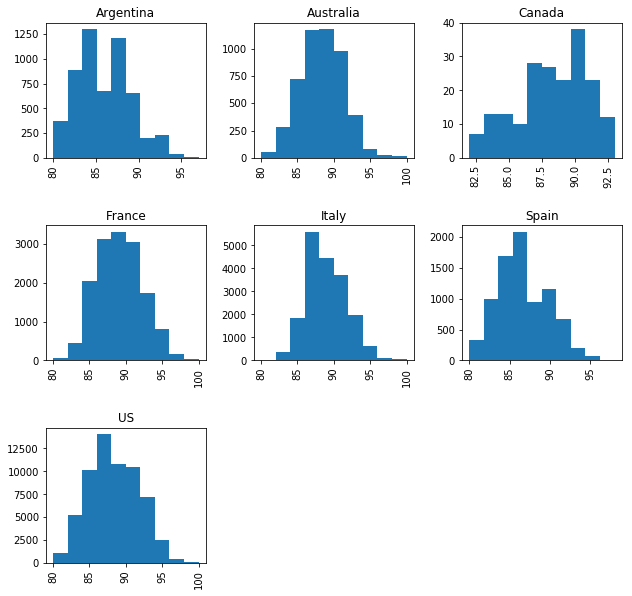

In [523]:
raw_df = pd.read_csv(os.path.join(data_dir, 'wine-data-postprocessed.csv'))
raw_df['points'].hist(by=raw_df['country'], figsize=(10,10))

In [524]:
raw_df.groupby(['variety']).mean()

,points,price,age,life
variety,,,,
Aglianico,88.671815,33.169884,-0.567568,-0.733591
Airen,81.333333,8.833333,-1.000000,-1.000000
Albana,90.000000,35.571429,-1.000000,-1.000000
Albariño,87.338374,19.982987,-0.270321,-1.000000
Albarossa,88.000000,40.000000,-1.000000,-1.000000
Albarín,84.000000,15.000000,-1.000000,-1.000000
Aleatico,85.300000,37.900000,-1.000000,-1.000000
Alicante,87.300000,24.300000,-1.000000,-1.000000
Alicante Bouschet,87.000000,28.666667,-1.000000,-1.000000


In [525]:
def points_to_class(points):
    if points in range(80,83):
        return 0
    elif points in range(83,87):
        return 1
    elif points in range(87,90):
        return 2
    elif points in range(90,94):
        return 3
    elif points in range(94-98):
        return 4
    else:
        return 5

In [526]:
raw_df['rating'] = raw_df['points'].apply(points_to_class)

In [527]:
raw_df.groupby(['rating']).count()

,country,description,points,price,province,region_1,variety,winery,age,life
rating,,,,,,,,,,
0,5371,5371,5371,5371,5371,5371,5371,5371,5371,5371
1,34253,34253,34253,34253,34253,34253,34253,34253,34253,34253
2,38009,38009,38009,38009,38009,38009,38009,38009,38009,38009
3,31619,31619,31619,31619,31619,31619,31619,31619,31619,31619
5,5141,5141,5141,5141,5141,5141,5141,5141,5141,5141


In [528]:
def points_to_merged_class(points):
    if points in range(80,87):
        return 0
    elif points in range(87,90):
        return 1
    else: 
        return 2

In [529]:
raw_df['rating'] = raw_df['points'].apply(points_to_merged_class)
raw_df.groupby(['rating']).count()

,country,description,points,price,province,region_1,variety,winery,age,life
rating,,,,,,,,,,
0,39624,39624,39624,39624,39624,39624,39624,39624,39624,39624
1,38009,38009,38009,38009,38009,38009,38009,38009,38009,38009
2,36760,36760,36760,36760,36760,36760,36760,36760,36760,36760


In [530]:
raw_df['price'] = raw_df['price'].astype(int).astype(str)
raw_df['feature_string'] = raw_df[['country', 'province', 'region_1', 'winery', 'variety', 'price', 'description']]\
.agg(' '.join, axis=1)

In [531]:
print(raw_df.head())

  country                                        description  points price  \
0      US  This tremendous 100% varietal wine hails from ...      96   235   
1   Spain  Ripe aromas of fig, blackberry and cassis are ...      96   110   
2      US  Mac Watson honors the memory of a wine once ma...      96    90   
3      US  This spent 20 months in 30% new French oak, an...      96    65   
4  France  This is the top wine from La Bégude, named aft...      95    66   

         province           region_1             variety  \
0      California        Napa Valley  Cabernet Sauvignon   
1  Northern Spain               Toro       Tinta de Toro   
2      California     Knights Valley     Sauvignon Blanc   
3          Oregon  Willamette Valley          Pinot Noir   
4        Provence             Bandol  Provence red blend   

                    winery  age  life  rating  \
0                    Heitz   -1    10       2   
1  Bodega Carmen Rodríguez   -1     3       2   
2                 Macau

In [532]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import *

def feature_to_words(text):
    nltk.download("stopwords", quiet=True)
    stemmer = PorterStemmer()
    
    text = re.sub(r"[^a-zA-Z0-9]", " ", text.lower()) # Convert to lower case
    words = text.split() # Split string into words
    words = [w for w in words if w not in stopwords.words("english")] # Remove stopwords
    words = [PorterStemmer().stem(w) for w in words] # stem
    return words

In [533]:
raw_df['feature_words'] = raw_df['feature_string'].apply(feature_to_words)
raw_df.drop(['feature_string'], axis=1, inplace=True)

In [534]:
raw_df.drop(['age', 'life'], axis=1, inplace=True)
print(raw_df.head())

  country                                        description  points price  \
0      US  This tremendous 100% varietal wine hails from ...      96   235   
1   Spain  Ripe aromas of fig, blackberry and cassis are ...      96   110   
2      US  Mac Watson honors the memory of a wine once ma...      96    90   
3      US  This spent 20 months in 30% new French oak, an...      96    65   
4  France  This is the top wine from La Bégude, named aft...      95    66   

         province           region_1             variety  \
0      California        Napa Valley  Cabernet Sauvignon   
1  Northern Spain               Toro       Tinta de Toro   
2      California     Knights Valley     Sauvignon Blanc   
3          Oregon  Willamette Valley          Pinot Noir   
4        Provence             Bandol  Provence red blend   

                    winery  rating  \
0                    Heitz       2   
1  Bodega Carmen Rodríguez       2   
2                 Macauley       2   
3                 

In [535]:
raw_df.drop(['country', 'points', 'price', 'province', 'region_1', 'variety', 'winery', 'description'], axis=1, inplace=True)

In [536]:
print(raw_df.head())
raw_df.to_csv(os.path.join(data_dir, 'wine-data-postprocessed.csv'), index=False, header=True)

   rating                                      feature_words
0       2  [us, california, napa, valley, heitz, cabernet...
1       2  [spain, northern, spain, toro, bodega, carmen,...
2       2  [us, california, knight, valley, macauley, sau...
3       2  [us, oregon, willamett, valley, ponzi, pinot, ...
4       2  [franc, provenc, bandol, domain, de, la, b, gu...


In [537]:
import numpy as np
from sklearn.model_selection import train_test_split

train, test = train_test_split(raw_df, test_size=0.2)
print('Length of train set {} and length of test set {}'.format(len(train), len(test)))

Length of train set 91514 and length of test set 22879


In [538]:
from collections import Counter

def build_dict(data, vocab_size = 5000):
    """Construct and return a dictionary mapping each of the most frequently appearing words to a unique integer."""
    
    # TODO: Determine how often each word appears in `data`. Note that `data` is a list of sentences and that a
    #       sentence is a list of words.
    
    word_count = {} # A dict storing the words that appear in the reviews along with how often they occur
    all_words = [word for review in data for word in review] # flatten all reviews into one list
    word_count = Counter(all_words)
    
    # TODO: Sort the words found in `data` so that sorted_words[0] is the most frequently appearing word and
    #       sorted_words[-1] is the least frequently appearing word.
    
    word_count_sorted = sorted([(word_count[key], key) for key in word_count.keys()], key=lambda x: x[0], reverse=True)
    sorted_words = [pair[1] for pair in word_count_sorted]
        
    word_dict = {} # This is what we are building, a dictionary that translates words into integers
    for idx, word in enumerate(sorted_words[:vocab_size - 2]): # The -2 is so that we save room for the 'no word'
        word_dict[word] = idx + 2                              # 'infrequent' labels
        
    return word_dict

In [539]:
word_dict = build_dict(train['feature_words'].to_list())

In [540]:
print([list(word_dict.keys())[list(word_dict.values()).index(p)] for p in range(2,7)])

['wine', 'flavor', 'us', 'fruit', 'california']


In [541]:
import pickle
with open(os.path.join(data_dir, 'word_dict.pkl'), "wb") as f:
    pickle.dump(word_dict, f)

In [542]:
def convert_and_pad(word_dict, sentence, pad=50):
    NOWORD = 0 # We will use 0 to represent the 'no word' category
    INFREQ = 1 # and we use 1 to represent the infrequent words, i.e., words not appearing in word_dict
    
    working_sentence = [NOWORD] * pad
    
    for word_index, word in enumerate(sentence[:pad]):
        if word in word_dict:
            working_sentence[word_index] = word_dict[word]
        else:
            working_sentence[word_index] = INFREQ
            
    return working_sentence, min(len(sentence), pad)

def convert_and_pad_data(word_dict, data, pad=50):
    result = []
    lengths = []
    
    for sentence in data:
        converted, leng = convert_and_pad(word_dict, sentence, pad)
        result.append(converted)
        lengths.append(leng)
        
    return np.array(result), np.array(lengths)

In [543]:
train_X, train_X_len = convert_and_pad_data(word_dict, train['feature_words'].to_list())
test_X, test_X_len = convert_and_pad_data(word_dict, test['feature_words'].to_list())

In [544]:
#train_y = pd.get_dummies(train['rating'], prefix='rating').to_numpy()
#test_y = pd.get_dummies(test['rating'], prefix='rating').to_numpy()
train_y = train['rating'].to_numpy()
test_y = test['rating'].to_numpy()

In [545]:
print(train_X[25], train_y[25])
#np.where((test_y == (0, 0, 0)).all(axis=1))

[   4   48  121    7  108 4880  273  299 1299  266  162 1755  116  418
    3  623  308  175  171  403  594   31   35  705  785    2  613    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0] 0


In [546]:
pd.concat([pd.DataFrame(train_y), pd.DataFrame(train_X_len), pd.DataFrame(train_X)], axis=1) \
        .to_csv(os.path.join(data_dir, 'train.csv'), header=False, index=False)

In [547]:
import sagemaker

sagemaker_session = sagemaker.Session()

bucket = sagemaker_session.default_bucket()
prefix = 'sagemaker/wine_lstm'

role = sagemaker.get_execution_role()

input_data = sagemaker_session.upload_data(path=data_dir, bucket=bucket, key_prefix=prefix)


In [548]:
print(role)

arn:aws:iam::816484814286:role/service-role/AmazonSageMaker-ExecutionRole-20200205T171423


In [549]:
print(input_data)

s3://sagemaker-ap-southeast-1-816484814286/sagemaker/wine_lstm


In [550]:
import torch
import torch.utils.data

# Read in only the first 250 rows
train_sample = pd.read_csv(os.path.join(data_dir, 'train.csv'), header=None, names=None, nrows=250)

# Turn the input pandas dataframe into tensors
train_sample_y = torch.from_numpy(train_sample[[0]].values).long().squeeze()
train_sample_X = torch.from_numpy(train_sample.drop([0], axis=1).values).long()

# Build the dataset
train_sample_ds = torch.utils.data.TensorDataset(train_sample_X, train_sample_y)
# Build the dataloader
train_sample_dl = torch.utils.data.DataLoader(train_sample_ds, shuffle=True, batch_size=50)

In [551]:
def train(model, train_loader, epochs, optimizer, loss_fn, device):
    for epoch in range(1, epochs + 1):
        model.train()
        total_loss = 0
        for batch in train_loader:         
            batch_X, batch_y = batch
            
            batch_X = batch_X.to(device)
            batch_y = batch_y.to(device)
            
            # TODO: Complete this train method to train the model provided.
            output = model(batch_X)      
            loss = loss_fn(output, batch_y)
            loss.backward()
            optimizer.step()
            total_loss += loss.data.item()
        print("Epoch: {}, CELoss: {}".format(epoch, total_loss / len(train_loader)))

In [552]:
import torch.optim as optim
from train.model import LSTMClassifier

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = LSTMClassifier(32, 6, 5000).to(device)
optimizer = optim.Adam(model.parameters())
loss_fn = torch.nn.CrossEntropyLoss()

train(model, train_sample_dl, 25, optimizer, loss_fn, device)

/home/ec2-user/SageMaker/wine-score/train/model.py:29: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self.softmax(out.squeeze())


Epoch: 1, CELoss: 1.099537205696106
Epoch: 2, CELoss: 1.0973148822784424
Epoch: 3, CELoss: 1.095057201385498
Epoch: 4, CELoss: 1.0924098491668701
Epoch: 5, CELoss: 1.0897857904434205
Epoch: 6, CELoss: 1.087044358253479
Epoch: 7, CELoss: 1.0841856241226195
Epoch: 8, CELoss: 1.0811221837997436
Epoch: 9, CELoss: 1.0777692556381226
Epoch: 10, CELoss: 1.0741156578063964
Epoch: 11, CELoss: 1.0700961112976075
Epoch: 12, CELoss: 1.0657296419143676
Epoch: 13, CELoss: 1.0608441591262818
Epoch: 14, CELoss: 1.0553647518157958
Epoch: 15, CELoss: 1.0494439125061035
Epoch: 16, CELoss: 1.0433729410171508
Epoch: 17, CELoss: 1.0361740112304687
Epoch: 18, CELoss: 1.0288588047027587
Epoch: 19, CELoss: 1.0210612297058106
Epoch: 20, CELoss: 1.0128722786903381
Epoch: 21, CELoss: 1.003906798362732
Epoch: 22, CELoss: 0.9944669842720032
Epoch: 23, CELoss: 0.9850926876068116
Epoch: 24, CELoss: 0.9745045661926269
Epoch: 25, CELoss: 0.9635182023048401


In [553]:
from sagemaker.pytorch import PyTorch

estimator = PyTorch(entry_point="train.py",
                    source_dir="train",
                    role=role,
                    framework_version='0.4.0',
                    train_instance_count=1,
                    train_instance_type='ml.p2.xlarge',
                    hyperparameters={
                        'epochs': 10,
                        'hidden_dim': 6,
                        'embedding_dim': 16,
                        'vocab_size': 5000,
                   })

In [554]:
estimator.fit({'training': input_data})

2020-03-17 00:30:47 Starting - Starting the training job...
2020-03-17 00:30:49 Starting - Launching requested ML instances......
2020-03-17 00:31:50 Starting - Preparing the instances for training......
2020-03-17 00:33:18 Downloading - Downloading input data...
2020-03-17 00:33:47 Training - Downloading the training image.....bash: cannot set terminal process group (-1): Inappropriate ioctl for device
bash: no job control in this shell
2020-03-17 00:34:26,810 sagemaker-containers INFO     Imported framework sagemaker_pytorch_container.training
2020-03-17 00:34:26,835 sagemaker_pytorch_container.training INFO     Block until all host DNS lookups succeed.
2020-03-17 00:34:29,857 sagemaker_pytorch_container.training INFO     Invoking user training script.
2020-03-17 00:34:30,083 sagemaker-containers INFO     Module train does not provide a setup.py. 
Generating setup.py
2020-03-17 00:34:30,084 sagemaker-containers INFO     Generating setup.cfg
2020-03-17 00:34:30,084 sagemaker-container

In [562]:
# TODO: Deploy the trained model
predictor = estimator.deploy(instance_type='ml.m4.xlarge', initial_instance_count=1)

Using already existing model: sagemaker-pytorch-2020-03-17-00-30-47-281


-----------!

In [563]:
test_X = pd.concat([pd.DataFrame(test_X_len), pd.DataFrame(test_X)], axis=1)

In [564]:
# We split the data into chunks and send each chunk seperately, accumulating the results.

def predict(data, rows=512):
    split_array = np.array_split(data, int(data.shape[0] / float(rows) + 1))
    predictions = np.array([])
    for array in split_array:
        predictions = np.append(predictions, predictor.predict(array))
    
    return predictions

In [565]:
predictions = predict(test_X.values).tolist()
#predictions = [num for num in predictions]
print('Predictions:{}'.format(predictions[0:3]), 'Actual:{}'.format(test_y[0]))

Predictions:[0.9999250173568726, 7.465887028956786e-05, 3.471247680408851e-07] Actual:1


In [566]:
predictions_consolidated = [predictions[x:x+3].index(max(predictions[x:x+3])) for x in range(0, len(predictions), 3)]
print(len(predictions_consolidated))
print('Predictions:{}'.format(predictions_consolidated[5]), 'Actual:{}'.format(test_y[5]))

22879
Predictions:1 Actual:0


In [567]:
from sklearn.metrics import accuracy_score, confusion_matrix
accuracy_score(test_y, predictions_consolidated)
confusion_matrix(test_y, predictions_consolidated)

array([[5840, 1686,  381],
       [1672, 3899, 2076],
       [ 212, 1548, 5565]])

In [568]:
estimator.delete_endpoint()